In [1]:
#importing packages
import bs4 as bs
import requests
import yfinance as yf
import datetime
from pandas_datareader import data as pdr
import pandas as pd

In [2]:
resp = requests.get('https://en.wikipedia.org/wiki/S%26P_100')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]

In [3]:
yf.pdr_override()
df=pd.DataFrame()
for ticker in tickers:
    data=pdr.get_data_yahoo(ticker, start='1990-1-1', end='2023-12-31')
    data["Ticker"]=ticker
    df=pd.concat([df, data])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400.0,AAPL
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200.0,AAPL
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600.0,AAPL
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267663,123312000.0,AAPL
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800.0,AAPL
...,...,...,...,...,...,...,...
2023-05-30,103.290001,104.120003,102.610001,104.040001,104.040001,11938000.0,XOM
2023-05-31,102.290001,103.040001,101.739998,102.180000,102.180000,24926100.0,XOM
2023-06-01,101.750000,105.580002,101.260002,103.360001,103.360001,13551900.0,XOM


In [8]:
data=df[df["Ticker"]=="AAPL"]

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264117,183198400.0,AAPL
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265889,207995200.0,AAPL
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266776,221513600.0,AAPL
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267663,123312000.0,AAPL
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269435,101572800.0,AAPL
...,...,...,...,...,...,...,...
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400.0,AAPL
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300.0,AAPL
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800.0,AAPL


Text(0, 0.5, 'Stocks')

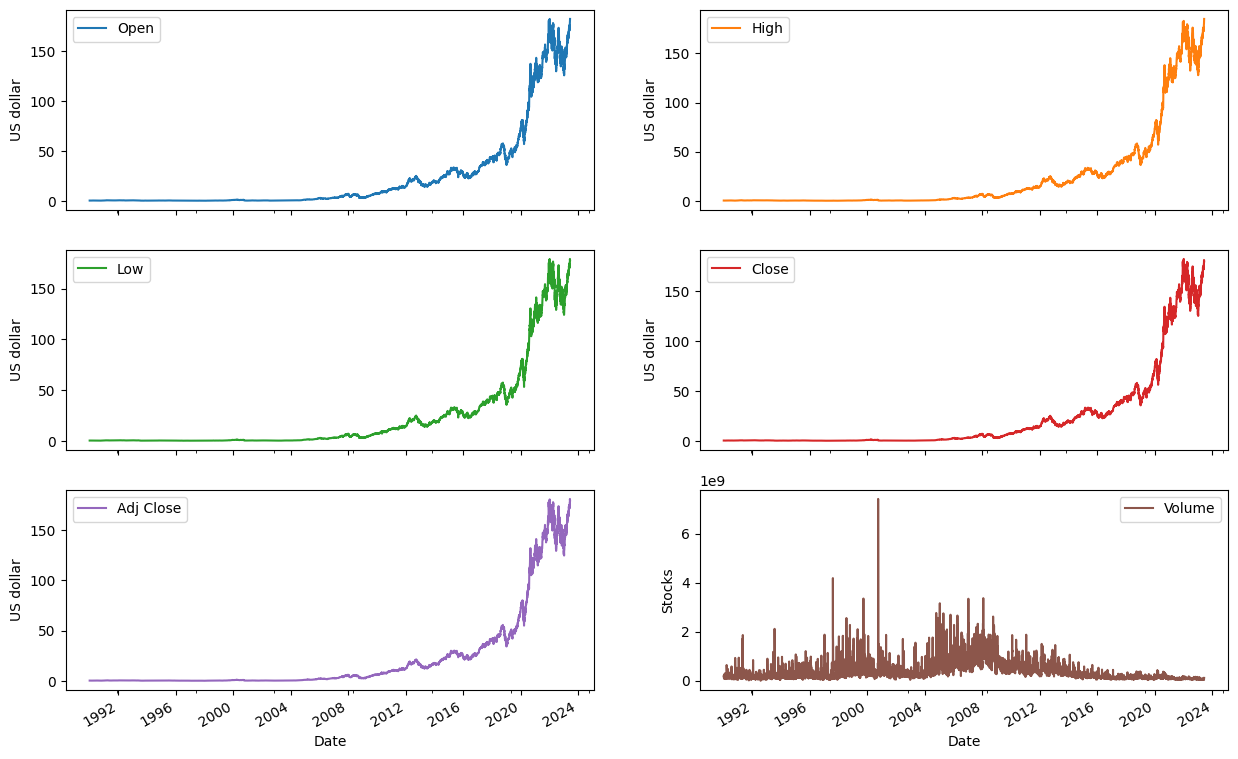

In [11]:
axes = data.plot(subplots=True,sharex=True,layout=(3,2),figsize=(15,10),ylabel="US dollar")
axes[2,1].set_ylabel('Stocks')

In [12]:
data.corr()

/var/folders/_3/kfc0qv_s26g37g1gn86kfc_c0000gn/T/ipykernel_32549/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999937,0.999924,0.999839,0.999581,-0.312389
High,0.999937,1.000000,0.999909,0.999924,0.999686,-0.311801
Low,0.999924,0.999909,1.000000,0.999926,0.999660,-0.313259
Close,0.999839,0.999924,0.999926,1.000000,0.999750,-0.312533
Adj Close,0.999581,0.999686,0.999660,0.999750,1.000000,-0.312543
Volume,-0.312389,-0.311801,-0.313259,-0.312533,-0.312543,1.000000
